In [4]:
from PyEIS import *

In [70]:
ex1 = EIS_exp(path='/Users/kedzie/Documents/Berkeley/Research/Data/2019/190606_Na_P50_impedance_CV/', data=['190606_Na_P50_impedance_CV_1_04_PEIS_C01.mpt'], cycle=[3,6,9,12,15,18])#, mask=['none',10**-.5])
#3,6,9,12,15,
newmcmb= EIS_exp(path='/Users/kedzie/Documents/Berkeley/Research/Data/2019/190612_Na_MCMB523_PEIS_CV/', data =['190612_Na_MCMB523_PEIS_CV_05_PEIS_C04.mpt'], cycle = [3])

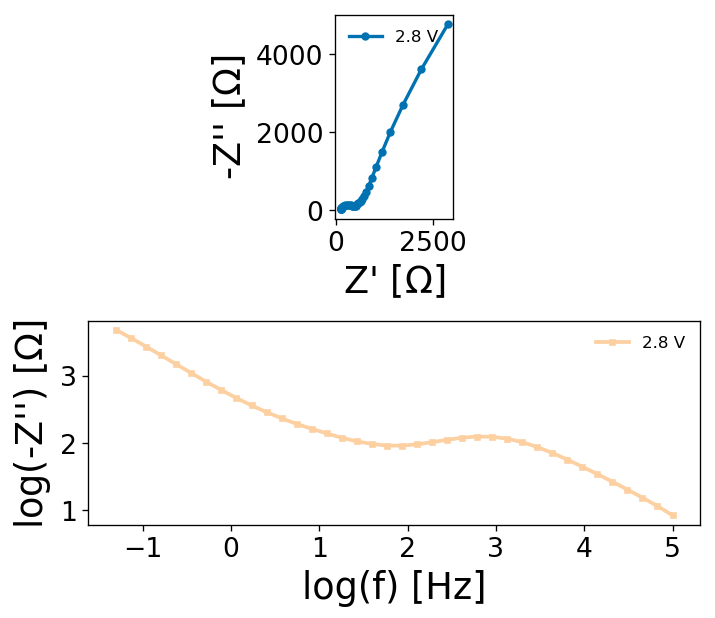

In [60]:
newmcmb.EIS_plot(legend='potential', bode='log_im')

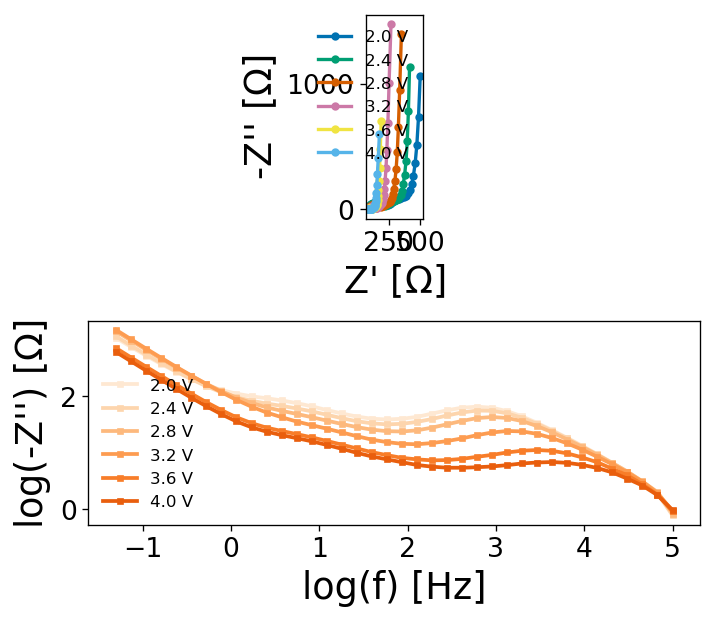

In [32]:
ex1.EIS_plot(legend='potential', bode='log_im')
#plt.savefig('/Users/kedzie/Desktop/p50 bode plot.png', dpi=600, orientation='portrait')

cycle || No. RC-elements ||   u
[1]            11            0.82
[2]            11            0.84
[3]            11            0.87
[4]            13            0.87
[5]            10            0.88
[6]            10            0.86


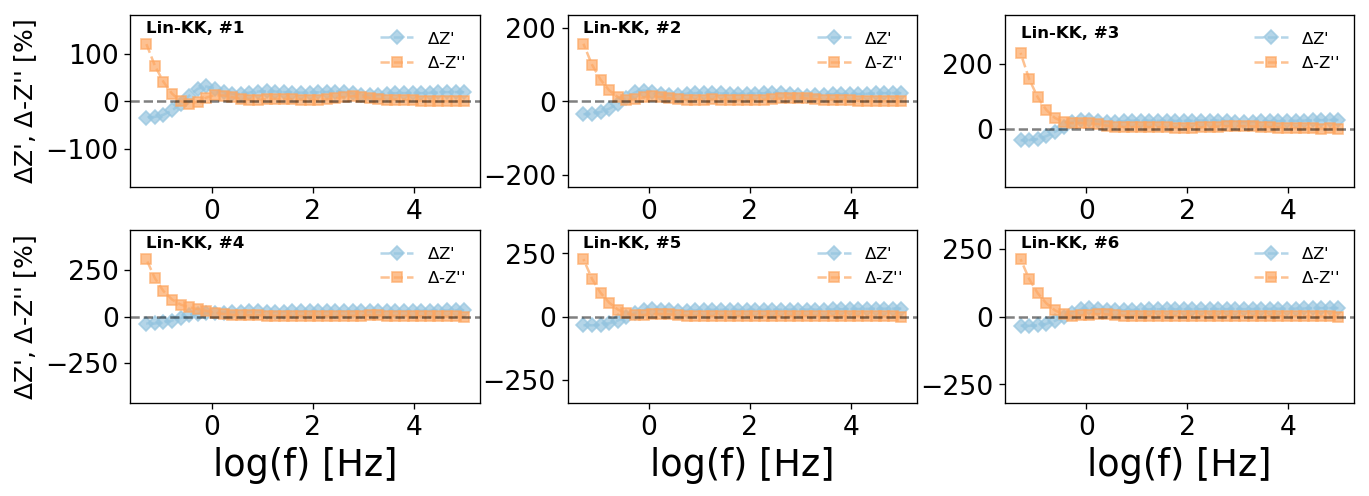

In [5]:
ex1.Lin_KK()

In [8]:

params = Parameters() #creates the parameter space

Rs_guess = 130 #read off the Nyquist plot
params.add('Rs', value=Rs_guess, min=90, max=200)


R1_guess = 350 #read off the Nyquist plot
params.add('R1', value=R1_guess, min=150, max=500)

fs1_guess = 10**3 #read off the Bode plot
params.add('fs1', value=fs1_guess, min=10**2, max=10**5)

n1_guess = 0.8 #guess
params.add('n1', value=n1_guess, min=.7, max=1) #restricted to be within reasonable values for an interface.


n_guess = 0.8 
params.add('n', value=n_guess, min=.7, max=1) #restricted to be within reasonable values for an interface.

Q_guess = 10**-1
params.add('Q', value=Q_guess, min=10**-6, max=10**5) #restricted to be within reasonable values for an interface.


Ri_guess = 10**2
params.add('Ri', value=Ri_guess, min=10**-1, max=10**6)

L_guess= 0.011575
params.add('L', value= L_guess, min=0.0114, max=0.0116)



In [64]:
#inputs
#    Rs = Series resistance [ohm]
    
#     R1 = Charge transfer resistance of RQ circuit [ohm]
#     fs1 = Summit frequency for RQ circuit [Hz]
#     n1 = Exponent for RQ circuit [-]
#     Q1 = Constant phase element of RQ circuit [s^n/ohm]
    
#     L = Length/Thickness of porous electrode [cm]
#     Ri = Ionic resistance inside of flodded pores [ohm/cm]
#     Q = Interfacial capacitance of non-faradaic interface [F/cm]
#     n = Exponent for the interfacial capacitance [-]
    

params = Parameters() #creates the parameter space

Rs_guess = 110 #read off the Nyquist plot
params.add('Rs', value=Rs_guess, min=80, max=200)


R1_guess = 260 #read off the Nyquist plot
params.add('R1', value=R1_guess, min=150, max=500)

fs1_guess = 10**2 #read off the Bode plot
params.add('fs1', value=fs1_guess, min=10**2, max=10**5)

n1_guess = 0.8 #guess
params.add('n1', value=n1_guess, min=.7, max=1) #restricted to be within reasonable values for an interface.


n_guess = 0.8 
params.add('n', value=n_guess, min=.7, max=1) #restricted to be within reasonable values for an interface.

Q_guess = 10**-1
params.add('Q', value=Q_guess, min=10**-6, max=10**3) #restricted to be within reasonable values for an interface.


Ri_guess = 10**2
params.add('Ri', value=Ri_guess, min=10**-1, max=10**6)

L_guess= 0.011575
params.add('L', value= L_guess, min=0.0114, max=0.0116)


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 174
    # data points      = 76
    # variables        = 8
    chi-square         = 0.25362430
    reduced chi-square = 0.00372977
    Akaike info crit   = -417.400229
    Bayesian info crit = -398.754363
[[Variables]]
    Rs:   130.609846 +/- 1.24161284 (0.95%) (init = 110)
    R1:   217.247418 +/- 2.15394596 (0.99%) (init = 260)
    fs1:  1091.22298 +/- 23.2396109 (2.13%) (init = 100)
    n1:   0.85058242 +/- 0.01030278 (1.21%) (init = 0.8)
    n:    0.78573702 +/- 0.00108033 (0.14%) (init = 0.8)
    Q:    0.04806514 +/- 0.18576989 (386.50%) (init = 0.1)
    Ri:   70673.9020 +/- 272975.755 (386.25%) (init = 100)
    L:    0.01143875 +/- 0.04420667 (386.46%) (init = 0.011575)
[[Correlations]] (unreported correlations are < 0.100)
    C(Q, L)    = -1.000
    C(Q, Ri)   =  1.000
    C(Ri, L)   = -1.000
    C(Rs, R1)  = -0.737
    C(R1, n1)  = -0.729
    C(Rs, n1)  =  0.540
    C(n, L)    =  0.423
    C(n, Q)   

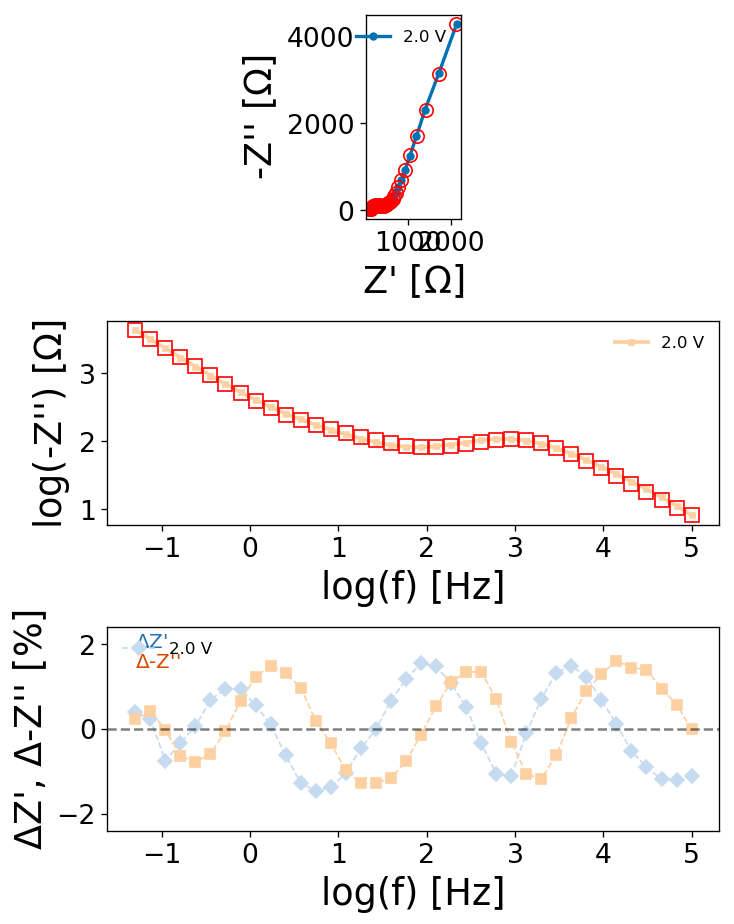

In [71]:
newmcmb.EIS_fit(params=params, circuit='R-RQ-TLsQ', weight_func='modulus')
newmcmb.EIS_plot(legend='potential', bode='log_im', fitting='on', rr='on')

In [ ]:

#ex1.EIS_fit(params=params, circuit='R-RQ-TLsQ', weight_func='modulus') #the fit string for a Randles circuit = 'R-(Q(RW))'
#ex1.EIS_plot(legend='potential', bode='log_im', fitting='on', rr='on')

In [ ]:
ex1.fit_E


In [ ]:
#=int(ex1.fit_Q)^(1/int(ex1.fit_n))*int(ex1.fit_Rs)^((1-int(ex1.fit_n))/int(ex1.fit_n))
Q=np.array(ex1.fit_Q)
n = np.array(ex1.fit_n)
Rs = np.array(ex1.fit_Rs)
E = np.array(ex1.fit_E)



plt.plot(ex1.fit_E, ex1.fit_Q^(1/ex1.fit_n)*ex1.fit_Rs^((1-ex1.fit_n)/ex1.fit_n), 'o--')

In [36]:
newmcmb.fit_Q
newmcmb.fit_n
newmcmb.fit_Rs

[128.23525935142402]